# Introduction to the maths of a neural network 


#### What even IS a neural network? What does it do?
A functions is a thing that maps an input to an output. It takes an input, perfoms some operation on it, potentially transforms it in some way, and then returns an output. We typically define functions explicitly. Explicitely defined functions have a very clear and predictable mapping from input to output.

So what if we have a set of inputs and a known set of outputs, but we don't actually know how to define the function that maps them together? Perhaps this function is extremely complicated and it is either unfeasible, or perhaps untractable, to formulate. This is where we can turn to neural networks for help.

Neural networks are function approximators. This means that they all boil down to (a thing) that maps an input to an output. The only difference is that we don't specify the function. We learn it over time. This mapping can be between anything that A) can be represented as a number and B) carries a signal. 

There is some necessary background for understanding simple neural networks. Neural networks are executed using linear algebra operations, so we'll cover the bare minimum here on what those operations are.

#### References
 - http://zmjones.com/static/statistical-learning/hornik-nn-1991.pdf
 - Bishop: p.137: http://users.isr.ist.utl.pt/~wurmd/Livros/school/Bishop%20-%20Pattern%20Recognition%20And%20Machine%20Learning%20-%20Springer%20%202006.pdf

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## The simplest linear function.

You can think of a linear function as a funciton that returns a linear combination of its inputs. 


We are all familiar with the most simple limple linear function:

$$ y = m * X+ b $$

 - b is the bias term (sometimes written as c or some other letter)
 - m is usually thought of as the slope
 - X is the independant variable
 - y is the dependant variable

In [2]:
x = 10
m = 0.5
b = 2

In [3]:
y = m*x + b

In [4]:
y

7.0

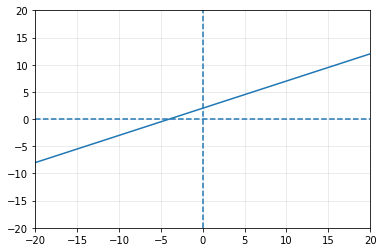

In [5]:
x = list(range(-25, 25))
def func(xs, m, b):
    assert type(x) == list
    return [m * x + b for x in xs]

ys = func(x, m, b)

#-------------------------------------
plt.plot(list(x), ys)
plt.axhline(0, linestyle='--')
plt.axvline(0, linestyle='--')
plt.grid(True, alpha=0.3)
plt.xlim((-20, 20))
plt.ylim((-20, 20));

## A less simple linear function

We can add (linear) terms to our linear function to get a more complex model.

$$y(x, w) = (w_1*x_1) + (w_2*x_2) + ... + (w_D * x_D) + b$$


These terms are 'linear' because they represent points that are scaled along a straight line according to $w$, which is referred to as the coefficient.

Previously, we only had a single term, so we could perform this operation manually. However, once we begin adding terms, this multiplication and addition becomes rather tedious.

In [6]:
# We could do this:
def bad_func(x1, x2, x3, w1, w2, w3):
    y = x1 * w1 + x2 * w2 + x3 * w3
    return y

# Or we could be more clever and do this
def still_bad_func(xs, ws):
    y = sum([x * w for x, w in zip(xs, ws)])
    return y

In [7]:
y = bad_func(2, 2, 4, 0.1, 0.5, 2)
y

9.2

In [8]:
y = still_bad_func((2, 2, 4), (0.1, 0.5, 2))
y

9.2

## The dot product - quick linear combinations

Weren't these two functions tedious? Fortunately, linear algebra provides us with the concept of the dot product, which we can use to perform this linear combination for us.

In [9]:
# We should be really clever and do this:
xs = np.array([2, 2, 4]).reshape(-1, 1)
ws = np.array([0.1, 0.5, 2]).reshape(-1, 1)

y = np.dot(xs.transpose(), ws)
float(y)

9.2

This may not immediately seem more simple, since we've introduced a method called 'transpose'. However, we'll find later that performing a linear combination using `np.dot` genearlizes to matrices, which we will need later when building a neural network.

**A note on notation:**

Formally, vectors are thought of as column vectors, i.e. a matrix with one column and $n$ number of rows (for each element of the vector). So a vector should be represented as a column inside of a 2d structure. Some operations are now not allowed if input vectors do not follow this convention.

When you come across certain operations written in mathematical notation, it can be confusion as to what the author means by a particular operation. For example, it is obvious to most people what is mean by:

$$x * y$$

when x and y are scalars (single numbers). However, it not necessarily obvious to everyone what is meant when x and y are vectors. Especially if the context isn't clear. The notation for this may be written to imply elementwise multiplication:

$$[x, y, z] * [x', y', z']$$ 

or perhaps a linear combination:

$$[[x], [y], [z]] * [x', y', z']$$

Sometimes you will see this written as:

$$xy$$

...whereas other times you might see it written as:

$$x^Ty$$

This is the more formal, and *clear*, way to write a linear combination of vectors. When both vectors are stored as column vectors (the nested lists shown above), then we simply follow the proper notation and transpose the first vector so that the linear combination can be computed. This tranpose must be taken since the linear combination of two column vectors or two row vectors is not defined, as their shapes are not compatible.

When we get to matrix operations, the notation can become even more confusion without understanding of the rules associated with vector and matrix operations.

if $X, A, B$ are matrices, then it might be difficult to understand what is meant by:

$$ABX$$

So to avoid unnecessary confusion later and to make remembering whats going on behind the scenes easier, we will follow the convention of always defining arrays as matrices.


## Systems of linear functions

A simple neural network can be built by layering systems of linear functions. To assemble a system of linear equations, we define a matrix. This matrix represents a linear transformation that maps the input to the output.

Neural networks are cool because they can approximate any function... almost. If a neural network is simply a system of linear functions, then it can learn a weight matrix that can be used to approximate any linear transformation. In other words, as long as the desired output can be mapped using a linear combination of the inputs, a neural network can model the transformation.

Of course, not all problems are actually linear transformations! For example, most natural language processing tasks are not mappings that can be approximated using linear transformation. So for a neural network to approximate linear _and_ non-linear functions, we introduce non-linear activation functions.

Regardless of what kind of mapping we are attempting to learn, neural networks still depend on linear combinations of the input.

# Linear combinations using matrix multiplication

We can compute linear combinations using the dot product. Here we are concerning ourselves with multiplying vectors with matrices, however this can be extended to multiplication between two or more matrices.

In [10]:
# define a transformation matrix
X = np.random.randint(0, 10, size=(3, 6))

In [11]:
X

array([[5, 3, 4, 1, 2, 9],
       [8, 0, 2, 2, 6, 4],
       [1, 7, 7, 2, 9, 2]])

In [12]:
X.shape

(3, 6)

In [13]:
# Define inputs
inputs = np.array([5, 3, 8]).reshape(-1, 1)

In [14]:
inputs

array([[5],
       [3],
       [8]])

In [15]:
inputs.shape

(3, 1)

In [16]:
# perform a linear combination of the inputs and the matrix X
np.dot(inputs.T, X)

array([[ 57,  71,  82,  27, 100,  73]])

## In the context of a neural network = a column of the matrix is a node

Neural networks use transformation matrices to map input variables to hidden state representations. So we have the familiar image:

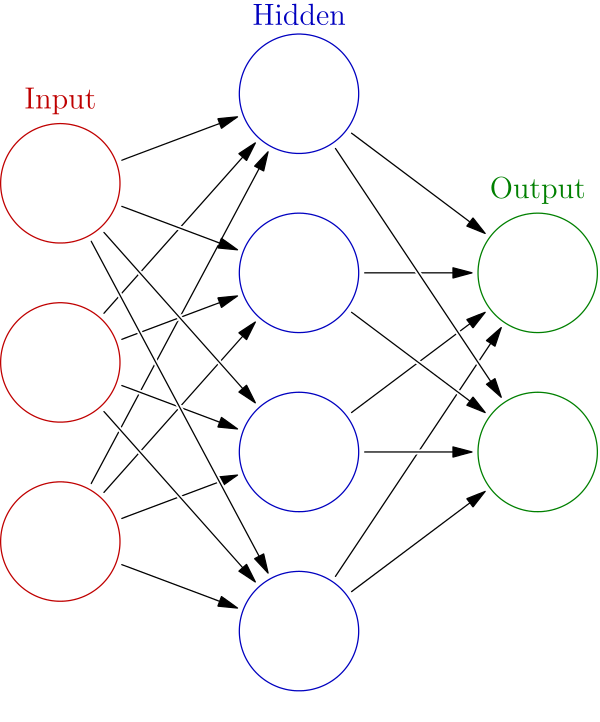

The arrows connecting the input circles to the hidden (blue) circles represent the tranformation matrix. So the shape of this matrix would be the number of input circles by the number of hidden circles. In the case above, the matrix would be shape [3, 4]. The columns of this matrix thus represent the nodes of the hidden layer, and to perform the matrix operation, we perform a linear combination with the values of the first column (for the first node of the layer) with the inputs and output the sum of the terms. We do the same thing with each successive column of the weight matrix - we perform a linear combination of the inputs and the column that represents the hidden node. 

When we talk about the output of each node, we are talking about the result of each linear combination of the input vector and that node's column of the weight matrix.

## Keep in mind: Matrix multiplication is associative, but NOT cummutative

When debugging and working out matrix multiplication, remember that the order of the vectors and matrices matter.

In [17]:
A = np.random.randint(0, 10, size=(5, 3))
B = np.random.randint(0, 10, size=(3, 4))
X = np.random.randint(0, 10, size=(3, 4))

Matrix multiplication is associative (multiplication sequence doesn't matter)

In [18]:
A.dot(B.dot(X.T))

array([[ 949,  936, 1217],
       [ 405,  429,  513],
       [1452, 1470, 1850],
       [1349, 1356, 1714],
       [ 855,  896, 1094]])

In [19]:
np.dot(A, B).dot(X.T)

array([[ 949,  936, 1217],
       [ 405,  429,  513],
       [1452, 1470, 1850],
       [1349, 1356, 1714],
       [ 855,  896, 1094]])

Matrix multipliation is NOT commutative (The order of the matrices does matter)

In [20]:
B.dot(np.dot(A, X).T)  # The result is not the same!

array([[1057,  726, 2024, 1886, 1318],
       [ 684,  459, 1294, 1206,  838],
       [ 690,  483, 1344, 1269,  851]])

With this little bit of back ground, we can move on to piecing together a simple neural network.

### Example application of a transformation matrix - the rotation matrix

A simple toy application of a tranformation matrix is the rotation matrix. We can use a rotation matrix to rotate points around the origin!

In [21]:
def rotation_matrix(vector, angle):
    " angle in radians! "
    rotation_matrix = np.array([[np.cos(angle), -np.sin(angle)],
                                [np.sin(angle), np.cos(angle)]])
    # linear transformation
    return np.dot(vector, rotation_matrix)

In [22]:
max(x)

24

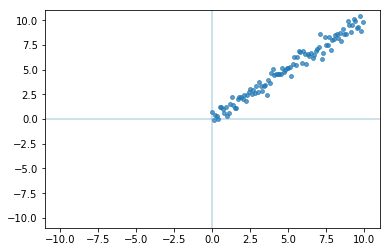

In [23]:
n = 100
x = list(x/10. for x in range(n))
y = (np.linspace(0, 10, n) + np.random.normal(0.0, .5, n))

plt.scatter(x, y, alpha=0.7, s=15)
plt.xlim((-11, 11)); plt.ylim((-11, 11))
plt.axvline(0, alpha=0.3); plt.axhline(0, alpha=0.3);

In [24]:
np.pi

3.141592653589793

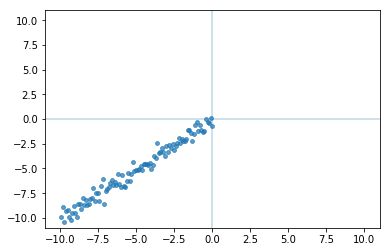

In [25]:
# rotate the points 180 degrees
new_points = list()
for _x, _y in zip(x, y):
    points = np.array([_x, _y])
    new_points.append(rotation_matrix(points, np.pi))
new_points = np.asarray(new_points)

# rotation
plt.scatter(new_points[:, 0], new_points[:, 1], alpha=0.7, s=15)
plt.xlim((-11, 11)); plt.ylim((-11, 11))
plt.axvline(0, alpha=0.3); plt.axhline(0, alpha=0.3);

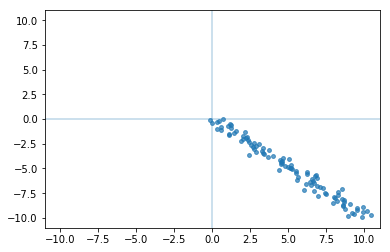

In [26]:
# rotate the points
new_points = list()
for _x, _y in zip(x, y):
    points = np.array([_x, _y])
    new_points.append(rotation_matrix(points, np.pi/2.))
new_points = np.asarray(new_points)

# rotation
plt.scatter(new_points[:, 0], new_points[:, 1], alpha=0.7, s=15)
plt.xlim((-11, 11)); plt.ylim((-11, 11))
plt.axvline(0, alpha=0.3); plt.axhline(0, alpha=0.3);